In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score , train_test_split
from sklearn.preprocessing import RobustScaler
from scipy.stats.mstats import winsorize

In [49]:
data = pd.read_csv('data.csv')

In [50]:
data.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [51]:
data.drop('Address' , axis=1 , inplace=True)

In [52]:
data['Price'] =data['Price'].round()

In [53]:
data.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593900e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975775e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


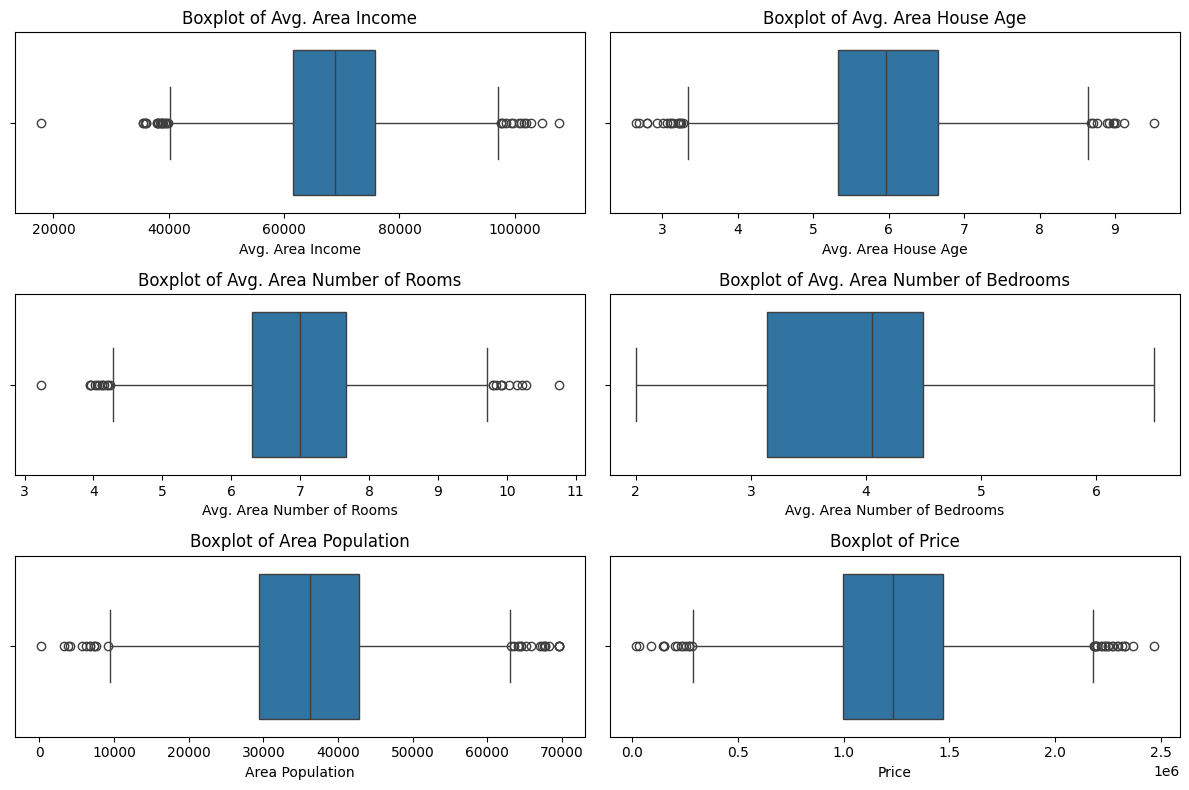

In [54]:
fig, ax = plt.subplots(3, 2, figsize=(12, 8))
axes_ = ax.flatten()


for i, column in enumerate(data.columns):
    sns.boxplot(x=data[column], ax=axes_[i])
    axes_[i].set_title(f"Boxplot of {column}")

plt.tight_layout()
plt.show()

In [55]:
col = data.columns

In [56]:
def check_outliers(data, col):
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)

    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5*IQR
    upper_bound = Q3 + 1.5*IQR

    outliers = data[col][(data[col] < lower_bound) | (data[col] > upper_bound)]

    print("Outliers Report")

    print(f"The total number of outliers in Data: {len(outliers)}")

    plt.figure(figsize=(6,6))
    plt.subplot(211)
    plt.plot(data[col])
    plt.title(col + " with Outliers")
    plt.scatter(x=outliers.index, y=outliers.values, marker="X", color='r', s=100)

    plt.subplot(212)
    plt.title(col + " after removing Extreme Values")
    filter_data = data[col][-(data[col].isin(outliers))]
    sns.boxplot(filter_data)

Outliers Report
The total number of outliers in Data: 35


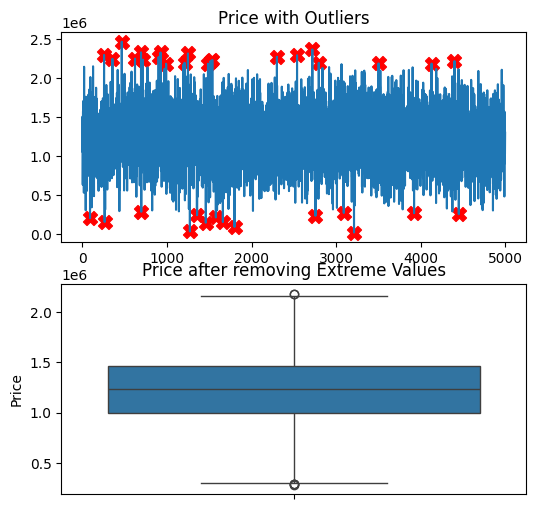

In [74]:

check_outliers(data , col[5])


In [58]:
data_copy = data.copy()

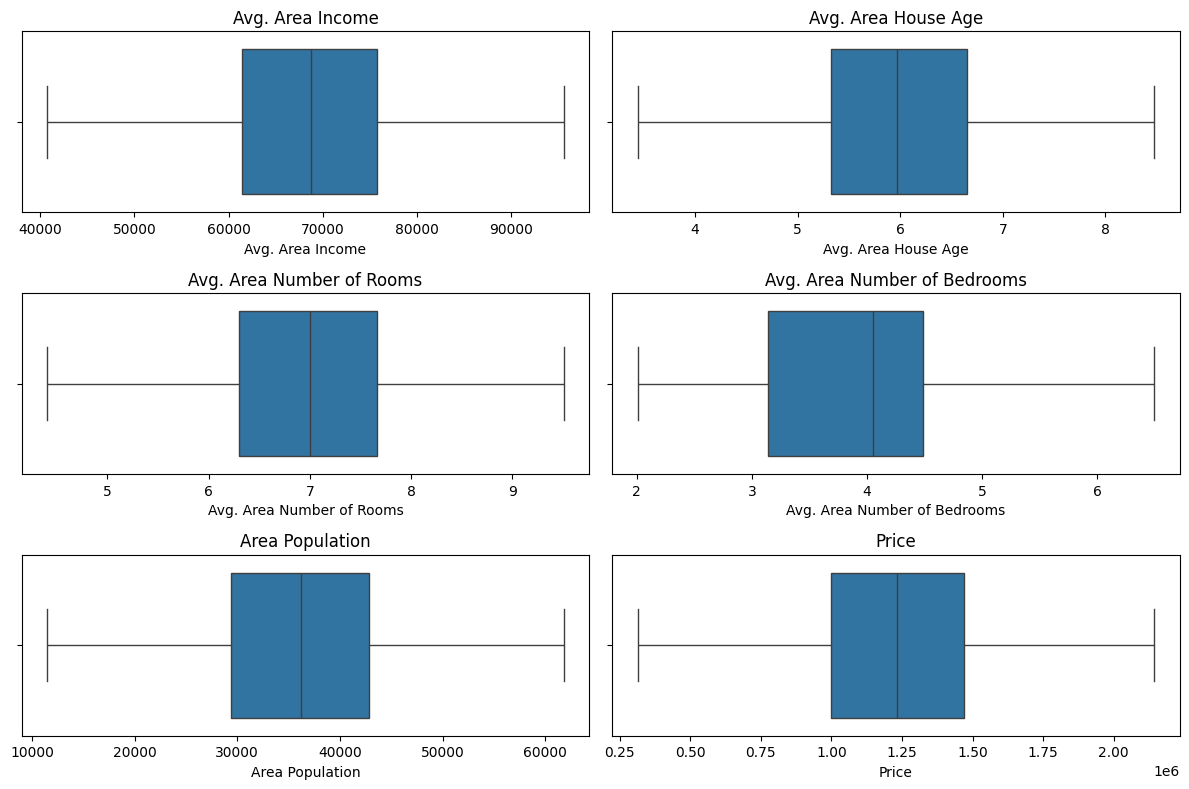

In [59]:
def apply_winsorize(data, col):
    winsorize(data[col], limits= [0.005, 0.005], inplace=True)
for i, j in data.items():
    apply_winsorize(data_copy, i)
fig, ax = plt.subplots(3,2, figsize=(12,8))
axes_ = [axes_row for axes in ax for axes_row in axes]

for i, j in enumerate(data.columns):
    g = sns.boxplot(x = data_copy[j], ax = axes_[i])
    g.set_title(j)
    plt.tight_layout()

In [60]:
X = data_copy.iloc[: , data.columns!='Price']
Y = data['Price']

In [61]:
Y.shape

(5000,)

In [62]:
X_train , X_test , Y_train , Y_test = train_test_split(X , Y , test_size=0.3 , random_state=0)

In [64]:
sc = StandardScaler()
sc.fit(X_train)

StandardScaler()

In [65]:
X_train = sc.transform(X_train)
X_test = sc.transform(X_test)

In [67]:
k_val = range(1,20)
cross_val = []

In [89]:
for k in k_val:
  knn = KNeighborsRegressor(n_neighbors=k , metric='manhattan')
  mse = -cross_val_score(knn, X_train, Y_train, cv=5, scoring='neg_mean_squared_error')
  cross_val.append(np.mean(mse))


In [91]:
best_k = k_val[np.argmin(cross_val)]
print(f"Best k value: {best_k}")

Best k value: 9


In [92]:
model = KNeighborsRegressor(n_neighbors=9)
model.fit(X_train , Y_train)

KNeighborsRegressor(n_neighbors=9)

In [93]:
y_pred = model.predict(X_test)

In [94]:
print(r2_score(Y_test , y_pred))

0.8730320470763362
